# Importing libraries and dataset

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
df = pd.read_csv('./laptop_data.csv', index_col=['Unnamed: 0'])

In [204]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [205]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


In [207]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
710,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.5kg,66546.7200
30,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89kg,13053.0672
927,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.31kg,62071.2000
281,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,22803.8400
141,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon RX 550,Windows 10,1.75kg,59461.5456


#Cleaning

### Problem 1: Remove "kg" from weight column and convert it to "float" data-type

In [208]:
df["Weight"].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [209]:
df["Weight"] = df["Weight"].str.replace("kg", "").astype("float")

Text(0.5, 1.0, 'Price vs Weight')

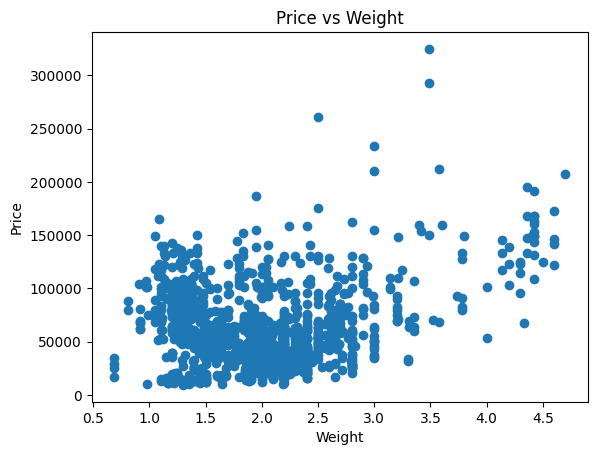

In [210]:
plt.scatter(df["Weight"], df["Price"])

plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Price vs Weight')

### Problem 2: Remove "GB" from Ram column and convert it to "int" data-type

In [211]:
df["Ram"].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [212]:
df["Ram(GB)"] = df["Ram"].str.replace("GB", "").astype("int")

In [213]:
df = df.drop("Ram", axis=1)

Text(0.5, 1.0, 'Price vs RAM')

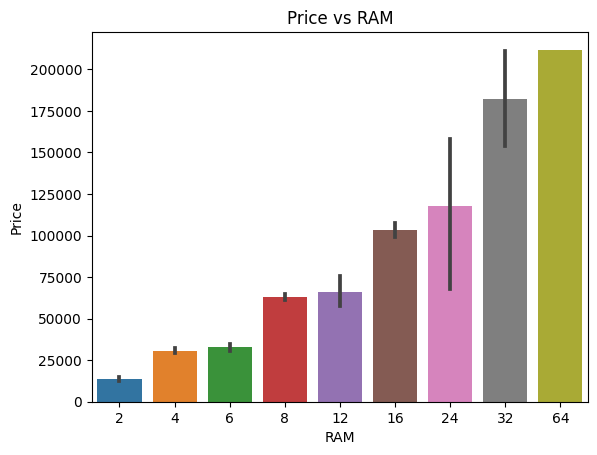

In [214]:
sns.barplot(x=df["Ram(GB)"], y=df["Price"])

plt.xlabel('RAM')
plt.ylabel('Price')
plt.title('Price vs RAM')

### Problem 3: Screen resolution has too many categories including the length and the breadth of the screen. So, create length and breadth column, then create differect columns for different features.

In [215]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [216]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [217]:
df["lb"] = df['ScreenResolution'].str.split(" ").apply(lambda x: x[-1])

In [218]:
df["lb"].unique()

array(['2560x1600', '1440x900', '1920x1080', '2880x1800', '1366x768',
       '2304x1440', '3200x1800', '1920x1200', '2256x1504', '3840x2160',
       '2160x1440', '2560x1440', '1600x900', '2736x1824', '2400x1600'],
      dtype=object)

In [219]:
df["length"] = df["lb"].str.split("x").apply(lambda x: x[0]).astype("int")

In [220]:
df["breadth"] = df["lb"].str.split("x").apply(lambda x: x[-1]).astype("int")

In [221]:
df = df.drop(["lb"], axis=1)

In [222]:
features = ["IPS Panel", "Retina Display", "Touchscreen", "Quad HD+", "Full HD", "4K Ultra HD"]

for feature in features:
  a=[]
  for i in df.ScreenResolution:
    if feature in i:
      a.append("Yes")
    else:
      a.append("No")
  df[feature] = a

In [223]:
df = df.drop(["ScreenResolution"], axis=1)

In [224]:
df["IPS Panel"] = df["IPS Panel"].astype("category")
df["Retina Display"] = df["Retina Display"].astype("category")
df["Touchscreen"] = df["Touchscreen"].astype("category")
df["Quad HD+"] = df["Quad HD+"].astype("category")
df["Full HD"] = df["Full HD"].astype("category")
df["4K Ultra HD"] = df["4K Ultra HD"].astype("category")

###Problem 4: Calculate ppi using length and breadth column

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Company         1303 non-null   object  
 1   TypeName        1303 non-null   object  
 2   Inches          1303 non-null   float64 
 3   Cpu             1303 non-null   object  
 4   Memory          1303 non-null   object  
 5   Gpu             1303 non-null   object  
 6   OpSys           1303 non-null   object  
 7   Weight          1303 non-null   float64 
 8   Price           1303 non-null   float64 
 9   Ram(GB)         1303 non-null   int32   
 10  length          1303 non-null   int32   
 11  breadth         1303 non-null   int32   
 12  IPS Panel       1303 non-null   category
 13  Retina Display  1303 non-null   category
 14  Touchscreen     1303 non-null   category
 15  Quad HD+        1303 non-null   category
 16  Full HD         1303 non-null   category
 17  4K Ultra HD     130

In [226]:
df["ppi"] = ((((df["length"]**2) + (df["breadth"]**2))**0.5)/df["Inches"]).astype("float")

In [227]:
df = df.drop("length", axis=1)
df = df.drop("breadth", axis=1)

Text(0.5, 1.0, 'Price vs Weight')

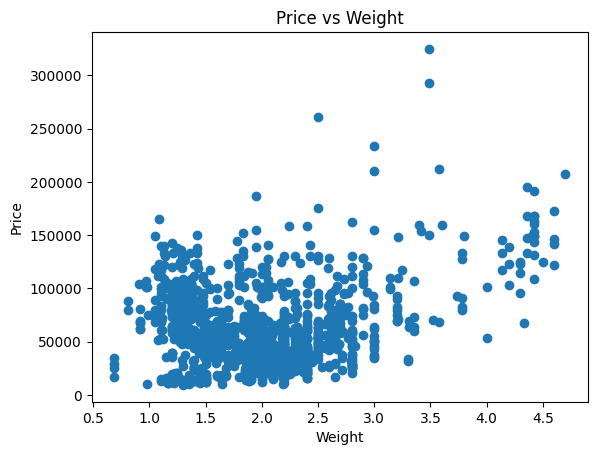

In [228]:
plt.scatter(df["Weight"], df["Price"])

plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Price vs Weight')

### Problem 5: Reduce the number of categories in "OpSys"

In [229]:
df["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [230]:
def os_change(x):

  if x == "Windows 10" or x == "Windows 10 S" or x == "Windows 7":
    return "Windows"
  elif x == "macOS" or x == "Mac OS X":
    return "Mac"
  else:
    return "linux/android/other"

In [231]:
df["OS"] = df["OpSys"].apply(os_change)

In [232]:
df = df.drop(["OpSys"], axis=1)

Text(0.5, 1.0, 'Price vs Operating System')

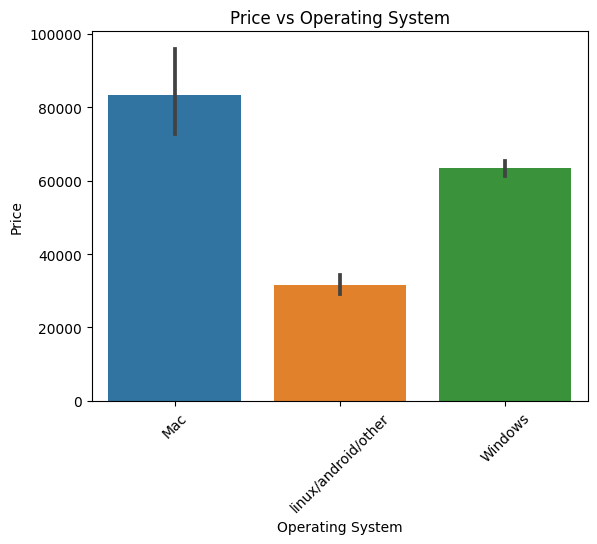

In [233]:
sns.barplot(x=df["OS"], y=df["Price"])

plt.xticks(rotation=45)
plt.xlabel('Operating System')
plt.ylabel('Price')
plt.title('Price vs Operating System')

### Problem 6: Convert "Memory" column to four types of storage type columns and that must contain respective storage values

In [234]:
df["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [235]:
storage_types = ['SSD', 'HDD', 'Flash', 'Hybrid']

for storage_type in storage_types:
    x = []
    for i in df['Memory'].str.split(" "):
        if storage_type in i:
           x.append(i[i.index(storage_type) - 1])
        else:
           x.append("0GB")
    df[storage_type] = x

In [236]:
df = df.drop(['Memory'], axis=1)

In [237]:
a = []
for x in df["SSD"]:
  if "GB" in x:
    a.append(float(x.replace("GB", "")))
  elif "TB" in x:
    a.append(float(x.replace("TB", ""))*1000) 

df["SSD"] = a

In [238]:
b = []
for x in df["HDD"]:
  if "GB" in x:
    b.append(float(x.replace("GB", "")))
  elif "TB" in x:
    b.append(float(x.replace("TB", ""))*1000) 

df["HDD"] = b

In [239]:
c = []
for x in df["Flash"]:
  if "GB" in x:
    c.append(float(x.replace("GB", "")))
  elif "TB" in x:
    c.append(float(x.replace("TB", ""))*1000) 

df["Flash"] = c

In [240]:
d = []
for x in df["Hybrid"]:
  if "GB" in x:
    d.append(float(x.replace("GB", "")))
  elif "TB" in x:
    d.append(float(x.replace("TB", ""))*1000) 

df["Hybrid"] = d

In [241]:
df["SSD"] = df["SSD"].astype("int")
df["HDD"] = df["HDD"].astype("int")
df["Flash"] = df["Flash"].astype("int")
df["Hybrid"] = df["Hybrid"].astype("int")

### Problem 7: Names of "Cpu" are too big so reduce their name size by taking first 3 words of their name and then reduce the number of cpu categories and create another column that will contain GHz values

In [242]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [243]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [244]:
y=[]
for i in df['Cpu'].str.split(" ").apply(lambda x: x[0:3]):
  y.append(' '.join(i))

df["Processor"] = y

In [245]:
df["Processor"].value_counts()

Processor
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          

In [246]:
z=[]

for processor in df.Processor:
    if "Intel Core i7" in processor:
        z.append("Intel Core i7")
    elif "Intel Core i5" in processor:
        z.append("Intel Core i5")
    elif "Intel Core i3" in processor:
        z.append("Intel Core i3")
    elif "Intel" in processor:
        z.append("Intel Others")
    elif "AMD" in processor:
        z.append("AMD")
    else:
        z.append("Others")

df["Processor"] = z

In [247]:
df['Processor'].value_counts()

Processor
Intel Core i7    527
Intel Core i5    423
Intel Others     154
Intel Core i3    136
AMD               62
Others             1
Name: count, dtype: int64

In [248]:
df = df[df["Processor"]!="Others"]

In [249]:
df['Processor'].value_counts()

Processor
Intel Core i7    527
Intel Core i5    423
Intel Others     154
Intel Core i3    136
AMD               62
Name: count, dtype: int64

In [250]:
df["GHz"] = df['Cpu'].str.split(" ").apply(lambda x: x[-1]).str.replace("GHz","").astype("float")

In [251]:
df = df.drop('Cpu', axis=1)

Text(0.5, 1.0, 'Price vs Processro')

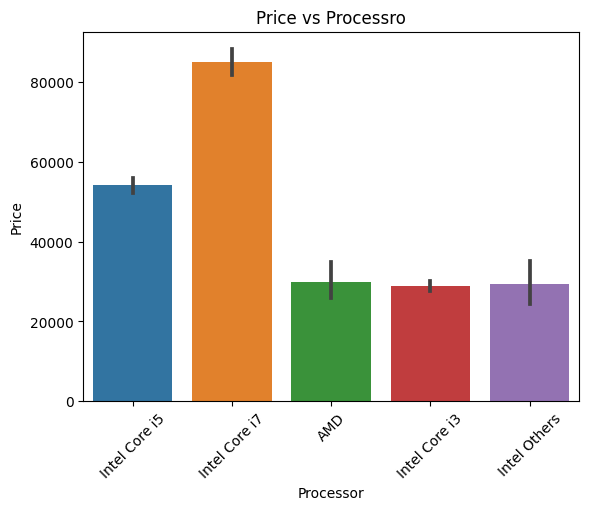

In [252]:
sns.barplot(x=df["Processor"], y=df["Price"])

plt.xticks(rotation=45)
plt.xlabel('Processor')
plt.ylabel('Price')
plt.title('Price vs Processro')

### Problem 8: Just extract the company name from "Gpu" column

In [253]:
df["Gpu"].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [254]:
df["Gpu"] = df["Gpu"].str.split(" ").apply(lambda x: x[0])

Text(0.5, 1.0, 'Price vs GPU')

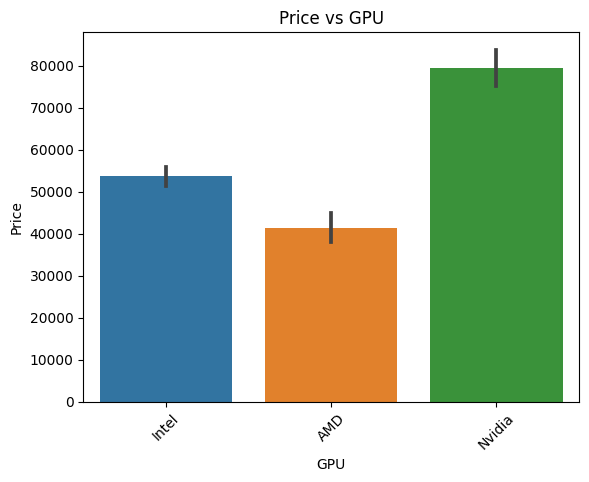

In [255]:
sns.barplot(x=df["Gpu"], y=df["Price"])

plt.xticks(rotation=45)
plt.xlabel('GPU')
plt.ylabel('Price')
plt.title('Price vs GPU')

# Model - XGBoost

In [256]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [257]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [258]:
ohe = OneHotEncoder()
ohe.fit(X[["Company", "TypeName", "Gpu", "IPS Panel", "Retina Display", "Touchscreen", "Quad HD+", "Full HD", "4K Ultra HD", "OS", "Processor"]])
col_trans =  make_column_transformer((OneHotEncoder(categories=ohe.categories_), ["Company", "TypeName", "Gpu", "IPS Panel", "Retina Display", "Touchscreen", "Quad HD+", "Full HD", "4K Ultra HD", "OS", "Processor"]),
                                     remainder='passthrough')

In [259]:
from sklearn.model_selection import train_test_split
for i in range(1,11):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)

  from xgboost import XGBRegressor
  xgb = XGBRegressor()

  pipe_xgb = make_pipeline(col_trans, xgb)

  pipe_xgb.fit(X_train, y_train)

  y_pred_xgb=pipe_xgb.predict(X_test)

  r2score_xgb = r2_score(y_test, y_pred_xgb)

  print(i , r2score_xgb*100)

1 84.19096328047753
2 82.09586183491574
3 84.36997961805692
4 83.77907984865058
5 85.05358919339658
6 91.38712246734019
7 86.5297345068984
8 88.07263540653072
9 71.07163036746606
10 89.19525317744963


In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=6)

from xgboost import XGBRegressor
xgb = XGBRegressor()

pipe_xgb = make_pipeline(col_trans, xgb)

pipe_xgb.fit(X_train, y_train)

y_pred_xgb=pipe_xgb.predict(X_test)

r2score_xgb = r2_score(y_test, y_pred_xgb)

print(r2score_xgb*100)

91.38712246734019


# Exporting the model

In [261]:
import pickle

pickle.dump(df,open("df.pkl", "wb"))
pickle.dump(pipe_xgb,open("pipe.pkl", "wb"))